How many drinks do you want to calculate?
Please enter multiple drinks in chronological order. The order can be in any order. The format should be 'YYYY/MM/DD H:M', such as '2020/12/01 21:34'.
Formatted.
You entered these.
Is this OK?
Enter 'y' or 'n'.
2021/01/01 13:00
2021/01/01 18:00
Ready to go!
Please select a calculation mode for this date and time.
 : 2021/01/01 13:00
Mode 1 is calculated by the amount of caffeine per 100ml, Mode 2 is calculated by the total amount of the caffeine.
 Choose 1 or 2.
Enter the total amount of caffeine in mg.
Please select a calculation mode for this date and time.
 : 2021/01/01 18:00
Mode 1 is calculated by the amount of caffeine per 100ml, Mode 2 is calculated by the total amount of the caffeine.
 Choose 1 or 2.
Enter the total amount of caffeine in mg.


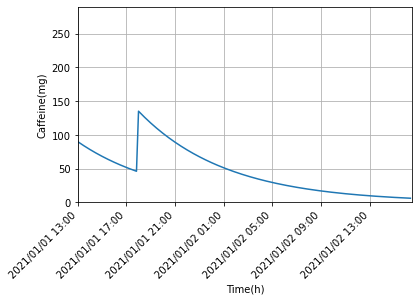

In [11]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as ppt
import datetime
from matplotlib import dates

from funcs import excp_handler
from funcs import caffe_cals
from funcs import mode_selecter
#sys.path.append('chronologiCal/funcs')

selected_mode = None

chronological_stmt = "Please enter multiple drinks in chronological order. The order can be in any order. The format should be 'YYYY/MM/DD H:M', such as '2020/12/01 21:34'."
check_drinks_stmt = "How many drinks do you want to calculate?"
mode_statement = "Mode 1 is calculated by the amount of caffeine per 100ml, Mode 2 is calculated by the total amount of the caffeine.\n Choose 1 or 2."
mode1_statement = "Enter first the amount of the drink and then the amount of caffeine per 100 ml, separated by a space"
mode2_statement = "Enter the total amount of caffeine in mg."


def datetimes_loop(N_o_D):
    global chronological_stmt
    dt_list = []
    dt_l = None
    def datetime_to_str(datetimes):
        str_datetime = datetime.datetime.strftime(datetimes, '%Y/%m/%d %H:%M')
        return str_datetime
    flag_datetimes = True
    print(chronological_stmt)

    while flag_datetimes == True:
        for i in range(N_o_D):
            dt_list.append(excp_handler.chrono_excp_handler())
        print("Formatted.")
        print("You entered these.\nIs this OK?\nEnter 'y' or 'n'.")
        for dt_l in dt_list:
            print(datetime_to_str(dt_l))
        flag_datetimes = excp_handler.yon_excp_handler(input())

    return dt_list


def chronological_cal(datetime_list):
    index = 0
    re_time_list = []
    R_T_L = []
    re_recaffe_list = []
    R_R_L = []
    rest_of_caffe = 0
    caffe_sum = 0
    returned_list = []
    caffe_amount = 0
    caffe_caled = 0

    if len(datetime_list) == 1:
        str_datetime = datetime.datetime.strftime(datetime_list[0], '%Y/%m/%d %H:%M')
        print("Please select a calculation mode for this date and time.\n : {0}".format(str_datetime))
        selected_mode = excp_handler.mode_excp_handler()
        caffe_amount = mode_selecter.mode_selecter(selected_mode)
        re_time_list, re_recaffe_list = caffe_cals.simple_calculator(caffe_amount, datetime_list[0])

        R_T_L.extend(re_time_list)
        R_R_L.extend(re_recaffe_list)

        return R_T_L, R_R_L, caffe_sum

    else:
            

        for dt_l in datetime_list:
            if len(datetime_list) == 1:
                break

            index += 1
            str_datetime = datetime.datetime.strftime(dt_l, '%Y/%m/%d %H:%M')
            print("Please select a calculation mode for this date and time.\n : {0}".format(str_datetime))
            selected_mode = excp_handler.mode_excp_handler()
            caffe_amount = mode_selecter.mode_selecter(selected_mode)
            if index == 1:
                re_time_list, re_recaffe_list, rest_of_caffe = caffe_cals.compare_calculator(caffe_amount, dt_l, datetime_list[index])
                R_T_L.extend(re_time_list)
                R_R_L.extend(re_recaffe_list)
                caffe_caled += rest_of_caffe
                caffe_sum += rest_of_caffe
                
                continue

            elif index < len(datetime_list) and index > 1:
                caffe_caled += caffe_amount
                re_time_list, re_recaffe_list, rest_of_caffe = caffe_cals.compare_calculator(caffe_caled, dt_l, datetime_list[index])
                R_T_L.extend(re_time_list)
                R_R_L.extend(re_recaffe_list)
                caffe_caled = rest_of_caffe
                caffe_sum += rest_of_caffe

                continue

            elif index >= len(datetime_list) - 1:
                caffe_caled += caffe_amount
                caffe_sum += rest_of_caffe
                re_time_list, re_recaffe_list = caffe_cals.simple_calculator(caffe_caled, dt_l)
                R_T_L.extend(re_time_list)
                R_R_L.extend(re_recaffe_list)
                
                continue

    return R_T_L, R_R_L, caffe_sum



datetime_list = datetimes_loop(excp_handler.number_excp_handler())
datetime_list = sorted(datetime_list)

#chrono_list = []
#chrono_list = chronological_cal(datetime_list)

caffe_sum = 0
dttm_list = []
caffe_list = []
dttm_list, caffe_list, caffe_sum = chronological_cal(datetime_list)
#print(chronological_cal(datetime_list))
#print(chrono_list)

if caffe_sum < 500:
    caffe_sum += 200
else:
    caffe_sum = caffe_sum * 5 

x1 = [dttm.strftime("%Y/%m/%d %H:%M") for dttm in dttm_list]
"""
for dttm in dttm_list:
    dttm = "{%Y/%m/%d %H:%M}".format(dttm)
    x1.append(dttm)
""" 
y1 = caffe_list

xticks_interval = 24
ppt.xlabel("Time(h)")
ppt.ylabel("Caffeine(mg)")
#ppt.gca().xaxis.set_major_formatter(dates.DateFormatter("%Y/%m/%d %H:%M"))
#ppt.gca().xaxis.set_major_locator(dates.HourLocator())
ppt.grid()
ppt.plot(x1, y1)
ppt.xlim(0, len(x1))
ppt.ylim(0, caffe_sum)
ppt.gcf().autofmt_xdate()
ppt.xticks(np.arange(0, len(x1), xticks_interval), rotation=45)
ppt.show()



In [ ]:
"""

df = pd.DataFrame(chrono_list)
print(chrono_list)
print(df.shape)

#x = df[0].astype('O')
#y = df[1]



days = dates.DayLocator()
hours = dates.HourLocator()
minutes = dates.MinuteLocator()
dttm_fmt = dates.DateFormatter("%Y/%m/%d %H:%M")

fig, ax = ppt.subplots()
#x = pd.to_datetime(df[0], format="%Y/%m/%d %H:%M").to_list()
x = df[0].to_series().datetime.strftime("%Y/%m/%d %H:%M")
y = df[1]
"""

"""
ax.plot(x, y)
ax.grid()

ax.xaxis.set_major_locator(days)
ax.xaxis.set_minor_locator(hours)
ax.xaxis.set_minor_locator(minutes)
ax.xaxis.set_major_formatter(dttm_fmt)

datetime_min = np.datetime64(x[0], '')
datetime_max = min(x), max(x)
ax.set_xlim(datetime_min, datetime_max)

"""
